In [1]:
import numpy as np
import pandas as pd 

In [2]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
import pydot

In [3]:
data=pd.read_csv('data/US_Accidents_Dec21_updated.csv')
data['Start_Time']=pd.to_datetime(data['Start_Time'])
data['End_Time']=pd.to_datetime(data['End_Time'])
data.insert(4,"time diff",(data['End_Time']-data["Start_Time"]).dt.total_seconds())
data.insert(3,"Year",pd.DatetimeIndex(data["Start_Time"]).year)
data.insert(4,"Month",pd.DatetimeIndex(data["Start_Time"]).month)
data.insert(5,"Day",pd.DatetimeIndex(data["Start_Time"]).day)
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].map({'Night':int(0), 'Day':int(1)})
data = data.drop(columns = ['Number','Zipcode','Airport_Code','Country','Wind_Chill(F)', 'Wind_Direction', 
                    'Amenity','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])
data

,ID,Severity,Start_Time,Year,Month,Day,End_Time,time diff,Start_Lat,Start_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,2016,2,8,2016-02-08 06:37:08,21600.0,40.108910,-83.092860,...,False,False,False,False,False,False,False,False,False,0.0
1,A-2,2,2016-02-08 05:56:20,2016,2,8,2016-02-08 11:56:20,21600.0,39.865420,-84.062800,...,False,False,False,False,False,False,False,False,False,0.0
2,A-3,2,2016-02-08 06:15:39,2016,2,8,2016-02-08 12:15:39,21600.0,39.102660,-84.524680,...,True,False,False,False,False,False,False,False,False,0.0
3,A-4,2,2016-02-08 06:51:45,2016,2,8,2016-02-08 12:51:45,21600.0,41.062130,-81.537840,...,False,False,False,False,False,False,False,False,False,0.0
4,A-5,3,2016-02-08 07:53:43,2016,2,8,2016-02-08 13:53:43,21600.0,39.172393,-84.492792,...,False,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019,8,23,2019-08-23 18:32:01,1716.0,34.002480,-117.379360,...,False,False,False,False,False,False,False,False,False,1.0
2845338,A-2845339,2,2019-08-23 19:11:30,2019,8,23,2019-08-23 19:38:23,1613.0,32.766960,-117.148060,...,False,False,False,False,False,False,False,False,False,1.0
2845339,A-2845340,2,2019-08-23 19:00:21,2019,8,23,2019-08-23 19:28:49,1708.0,33.775450,-117.847790,...,True,False,False,False,False,False,False,False,False,1.0
2845340,A-2845341,2,2019-08-23 19:00:21,2019,8,23,2019-08-23 19:29:42,1761.0,33.992460,-118.403020,...,False,False,False,False,False,False,False,False,False,1.0


In [4]:
#pip install mlxtend

In [5]:
S1=data[data["Severity"]==1]
S1
S2=data[data["Severity"]==2]
S2
S3=data[data["Severity"]==3]
S3
S4=data[data["Severity"]==4]
S4

severity_1_sample = S1
#severity_2_sample = S2.sample(n=23556,replace=False,random_state = 2)
severity_2_sample = S2.sample(n=23556,replace=False,random_state = 2)
severity_3_sample = S3.sample(n=23556,replace=False,random_state = 2)
severity_4_sample = S4.sample(n=23556,replace=False,random_state = 2)
severity_4_sample

data_resampling = pd.concat([severity_1_sample,severity_2_sample,severity_3_sample,severity_4_sample])
data_resampling

,ID,Severity,Start_Time,Year,Month,Day,End_Time,time diff,Start_Lat,Start_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
1735388,A-1735389,1,2020-08-03 14:35:16,2020,8,3,2020-08-03 15:20:16,2700.0,32.206760,-110.980500,...,False,False,False,False,False,True,False,True,False,1.0
1736991,A-1736992,1,2020-09-22 16:44:38,2020,9,22,2020-09-22 17:29:38,2700.0,32.380840,-110.963920,...,False,False,False,False,False,False,False,True,False,1.0
1749719,A-1749720,1,2020-08-03 15:42:10,2020,8,3,2020-08-03 15:57:10,900.0,41.379780,-81.994100,...,False,False,False,False,False,False,False,False,False,1.0
1751859,A-1751860,1,2020-09-22 16:29:33,2020,9,22,2020-09-22 17:14:33,2700.0,33.639500,-112.134360,...,False,False,False,False,False,False,False,True,False,1.0
1753408,A-1753409,1,2020-08-03 13:41:01,2020,8,3,2020-08-03 13:56:01,900.0,38.083200,-122.114500,...,True,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84673,A-84674,4,2016-07-08 09:15:06,2016,7,8,2016-07-08 15:15:06,21600.0,33.548070,-84.277031,...,False,False,False,False,False,False,False,True,False,1.0
1122367,A-1122368,4,2021-04-02 20:55:46,2021,4,2,2021-04-02 22:31:47,5761.0,37.104424,-121.014028,...,True,False,False,False,False,False,False,False,False,0.0
2078095,A-2078096,4,2020-05-28 06:06:18,2020,5,28,2020-05-28 08:06:18,7200.0,33.581950,-112.134150,...,False,False,False,False,False,False,False,True,False,1.0
825536,A-825537,4,2021-09-04 19:04:27,2021,9,4,2021-09-04 20:23:32,4745.0,38.853130,-76.909975,...,False,False,False,False,False,False,False,True,False,1.0


In [6]:
data_resampling = data_resampling.drop(columns =  ['ID','Start_Time', 'Month','Day',
                            'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','Description',
                           'Street','Side','City','County','Timezone','time diff', 'Weather_Timestamp',
                            'Weather_Condition','Turning_Loop'])

In [7]:
data_resampling = data_resampling.dropna()
data_resampling

,Severity,Year,Distance(mi),State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
1735388,1,2020,0.000,AZ,103.0,22.0,27.15,10.0,10.0,0.00,...,True,False,False,False,False,False,True,False,True,1.0
1736991,1,2020,0.000,AZ,95.0,19.0,27.16,10.0,10.0,0.00,...,False,False,False,False,False,False,False,False,True,1.0
1749719,1,2020,0.000,OH,68.0,93.0,29.14,9.0,5.0,0.02,...,False,False,False,False,False,False,False,False,False,1.0
1751859,1,2020,0.000,AZ,98.0,18.0,28.28,10.0,5.0,0.00,...,False,False,False,False,False,False,False,False,True,1.0
1753408,1,2020,0.000,CA,95.0,22.0,29.90,10.0,9.0,0.00,...,False,True,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593197,4,2021,0.130,VA,57.0,42.0,29.23,10.0,6.0,0.00,...,False,False,False,False,False,False,False,False,False,1.0
1122367,4,2021,0.427,CA,64.0,52.0,29.76,10.0,0.0,0.00,...,False,True,False,False,False,False,False,False,False,0.0
2078095,4,2020,0.994,AZ,75.0,23.0,28.24,10.0,0.0,0.00,...,False,False,False,False,False,False,False,False,True,1.0
825536,4,2021,0.011,MD,74.0,63.0,29.64,10.0,7.0,0.00,...,False,False,False,False,False,False,False,False,True,1.0


**Decision Tree of Balanced Data for CA**

In [8]:
data_CA = data_resampling[data_resampling["State"] == 'CA']

In [9]:
# Split dataset into training set and test set
features =['Visibility(mi)', 'Bump', 'Give_Way', 'Roundabout', 'Stop']
X = data_CA[features]
y = data_CA["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
# Create Decision Tree classifer object
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
print("Accuracy_CA:",metrics.accuracy_score(y_test, y_pred))

Accuracy_CA: 0.4954225352112676


In [12]:
dt_model = clf.best_params_
print(dt_model)

{'criterion': 'gini', 'max_depth': 8}


In [13]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=8)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

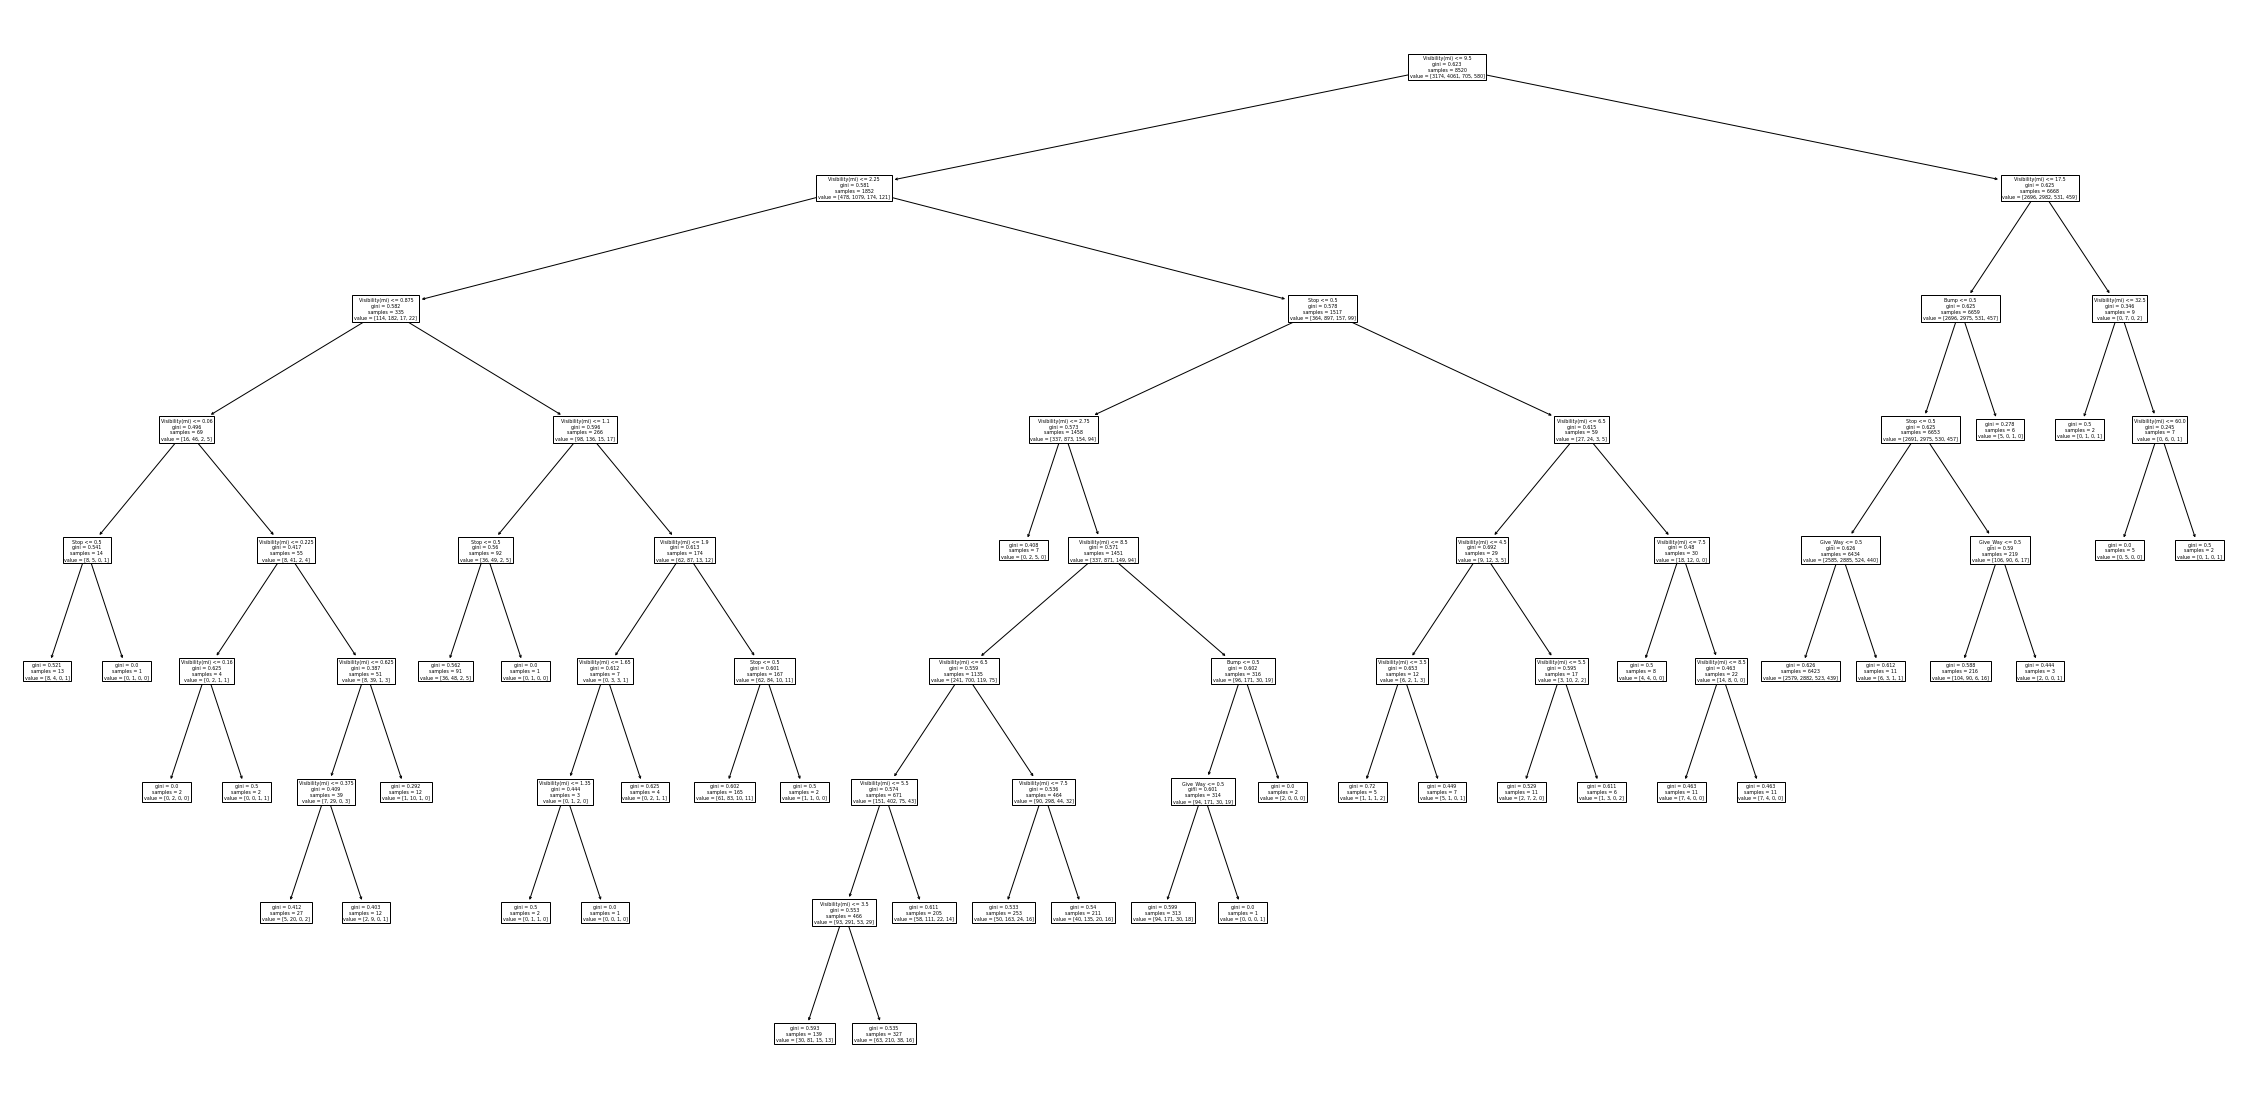

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(40,20))
tree.plot_tree(clf1,feature_names=features)
plt.savefig('foo.png', bbox_inches='tight', transparent = False)
plt.show()

**Decision Tree of Balanced Data for Year 2020**

In [15]:
data_2020 = data_resampling[data_resampling["Year"] == 2020]
X_2020 = data_2020[features]
y_2020 = data_2020["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X_2020, y_2020, test_size=0.25, random_state=0)

In [16]:
# Create Decision Tree classifer object
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy_NY:",metrics.accuracy_score(y_test, y_pred))

Accuracy_NY: 0.623824120071874


In [18]:
dt_model = clf.best_params_
print(dt_model)

{'criterion': 'entropy', 'max_depth': 8}


**Decision Tree of Balanced Data for Year 2016-2020**

In [19]:
# Split dataset into training set and test set

X = data_resampling[features]
y = data_resampling["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
# Create Decision Tree classifer object
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy_All:",metrics.accuracy_score(y_test, y_pred))

Accuracy_All: 0.37602977970342344


In [22]:
dt_model = clf.best_params_
print(dt_model)

{'criterion': 'entropy', 'max_depth': 7}


In [23]:
S1=data[data["Severity"]==1]
S1
S2=data[data["Severity"]==2]
S2
S3=data[data["Severity"]==3]
S3
S4=data[data["Severity"]==4]
S4

,ID,Severity,Start_Time,Year,Month,Day,End_Time,time diff,Start_Lat,Start_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
19,A-20,4,2016-02-08 21:00:17,2016,2,8,2016-02-09 03:00:17,21600.0,41.679361,-83.573037,...,False,False,False,False,False,False,False,False,False,0.0
26,A-27,4,2016-02-09 07:28:15,2016,2,9,2016-02-09 13:28:15,21600.0,39.775720,-84.048150,...,False,False,False,False,False,False,False,False,False,0.0
39,A-40,4,2016-02-09 15:33:59,2016,2,9,2016-02-09 21:33:59,21600.0,40.156298,-83.018431,...,False,False,False,False,False,False,False,False,False,1.0
42,A-43,4,2016-02-09 18:20:58,2016,2,9,2016-02-10 00:20:58,21600.0,40.451120,-85.150480,...,False,False,False,False,False,False,False,False,False,0.0
43,A-44,4,2016-02-09 18:20:58,2016,2,9,2016-02-10 00:20:58,21600.0,40.354290,-85.149930,...,False,False,False,False,False,False,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845302,A-2845303,4,2019-08-23 17:25:12,2019,8,23,2019-08-23 17:54:00,1728.0,38.995930,-121.672020,...,False,False,False,False,False,False,False,False,False,1.0
2845303,A-2845304,4,2019-08-23 17:25:12,2019,8,23,2019-08-23 17:54:00,1728.0,39.003170,-121.662679,...,False,False,False,False,False,False,False,False,False,1.0
2845314,A-2845315,4,2019-08-23 13:39:48,2019,8,23,2019-08-23 14:05:33,1545.0,33.685990,-117.886260,...,False,False,False,False,False,False,False,False,False,1.0
2845315,A-2845316,4,2019-08-23 13:39:48,2019,8,23,2019-08-23 14:05:33,1545.0,33.687300,-117.890190,...,True,False,False,False,False,False,False,False,False,1.0


In [24]:
severity_1_sample = S1
#severity_2_sample = S2.sample(n=23556,replace=False,random_state = 2)
severity_2_sample = S2.sample(n=400000,replace=False,random_state = 2)
severity_3_sample = S3
severity_4_sample = S4
severity_4_sample
data = pd.concat([severity_1_sample,severity_2_sample,severity_3_sample,severity_4_sample])
data = data.dropna()
data

,ID,Severity,Start_Time,Year,Month,Day,End_Time,time diff,Start_Lat,Start_Lng,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
1735388,A-1735389,1,2020-08-03 14:35:16,2020,8,3,2020-08-03 15:20:16,2700.0,32.20676,-110.980500,...,False,False,False,False,False,True,False,True,False,1.0
1736991,A-1736992,1,2020-09-22 16:44:38,2020,9,22,2020-09-22 17:29:38,2700.0,32.38084,-110.963920,...,False,False,False,False,False,False,False,True,False,1.0
1749719,A-1749720,1,2020-08-03 15:42:10,2020,8,3,2020-08-03 15:57:10,900.0,41.37978,-81.994100,...,False,False,False,False,False,False,False,False,False,1.0
1751859,A-1751860,1,2020-09-22 16:29:33,2020,9,22,2020-09-22 17:14:33,2700.0,33.63950,-112.134360,...,False,False,False,False,False,False,False,True,False,1.0
1753408,A-1753409,1,2020-08-03 13:41:01,2020,8,3,2020-08-03 13:56:01,900.0,38.08320,-122.114500,...,True,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845302,A-2845303,4,2019-08-23 17:25:12,2019,8,23,2019-08-23 17:54:00,1728.0,38.99593,-121.672020,...,False,False,False,False,False,False,False,False,False,1.0
2845303,A-2845304,4,2019-08-23 17:25:12,2019,8,23,2019-08-23 17:54:00,1728.0,39.00317,-121.662679,...,False,False,False,False,False,False,False,False,False,1.0
2845314,A-2845315,4,2019-08-23 13:39:48,2019,8,23,2019-08-23 14:05:33,1545.0,33.68599,-117.886260,...,False,False,False,False,False,False,False,False,False,1.0
2845315,A-2845316,4,2019-08-23 13:39:48,2019,8,23,2019-08-23 14:05:33,1545.0,33.68730,-117.890190,...,True,False,False,False,False,False,False,False,False,1.0


**DecisionTree of Imbalanced data for CA**

In [25]:
data_CA = data[data["State"] == 'CA']

In [26]:
# Split dataset into training set and test set
features =['Visibility(mi)', 'Bump', 'Give_Way', 'Roundabout', 'Stop']
X = data_CA[features]
y = data_CA["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
# Create Decision Tree classifer object
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
print("Accuracy_CA:",metrics.accuracy_score(y_test, y_pred))

Accuracy_CA: 0.8659070023892667


In [29]:
dt_model = clf.best_params_
print(dt_model)

{'criterion': 'entropy', 'max_depth': 4}


In [30]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

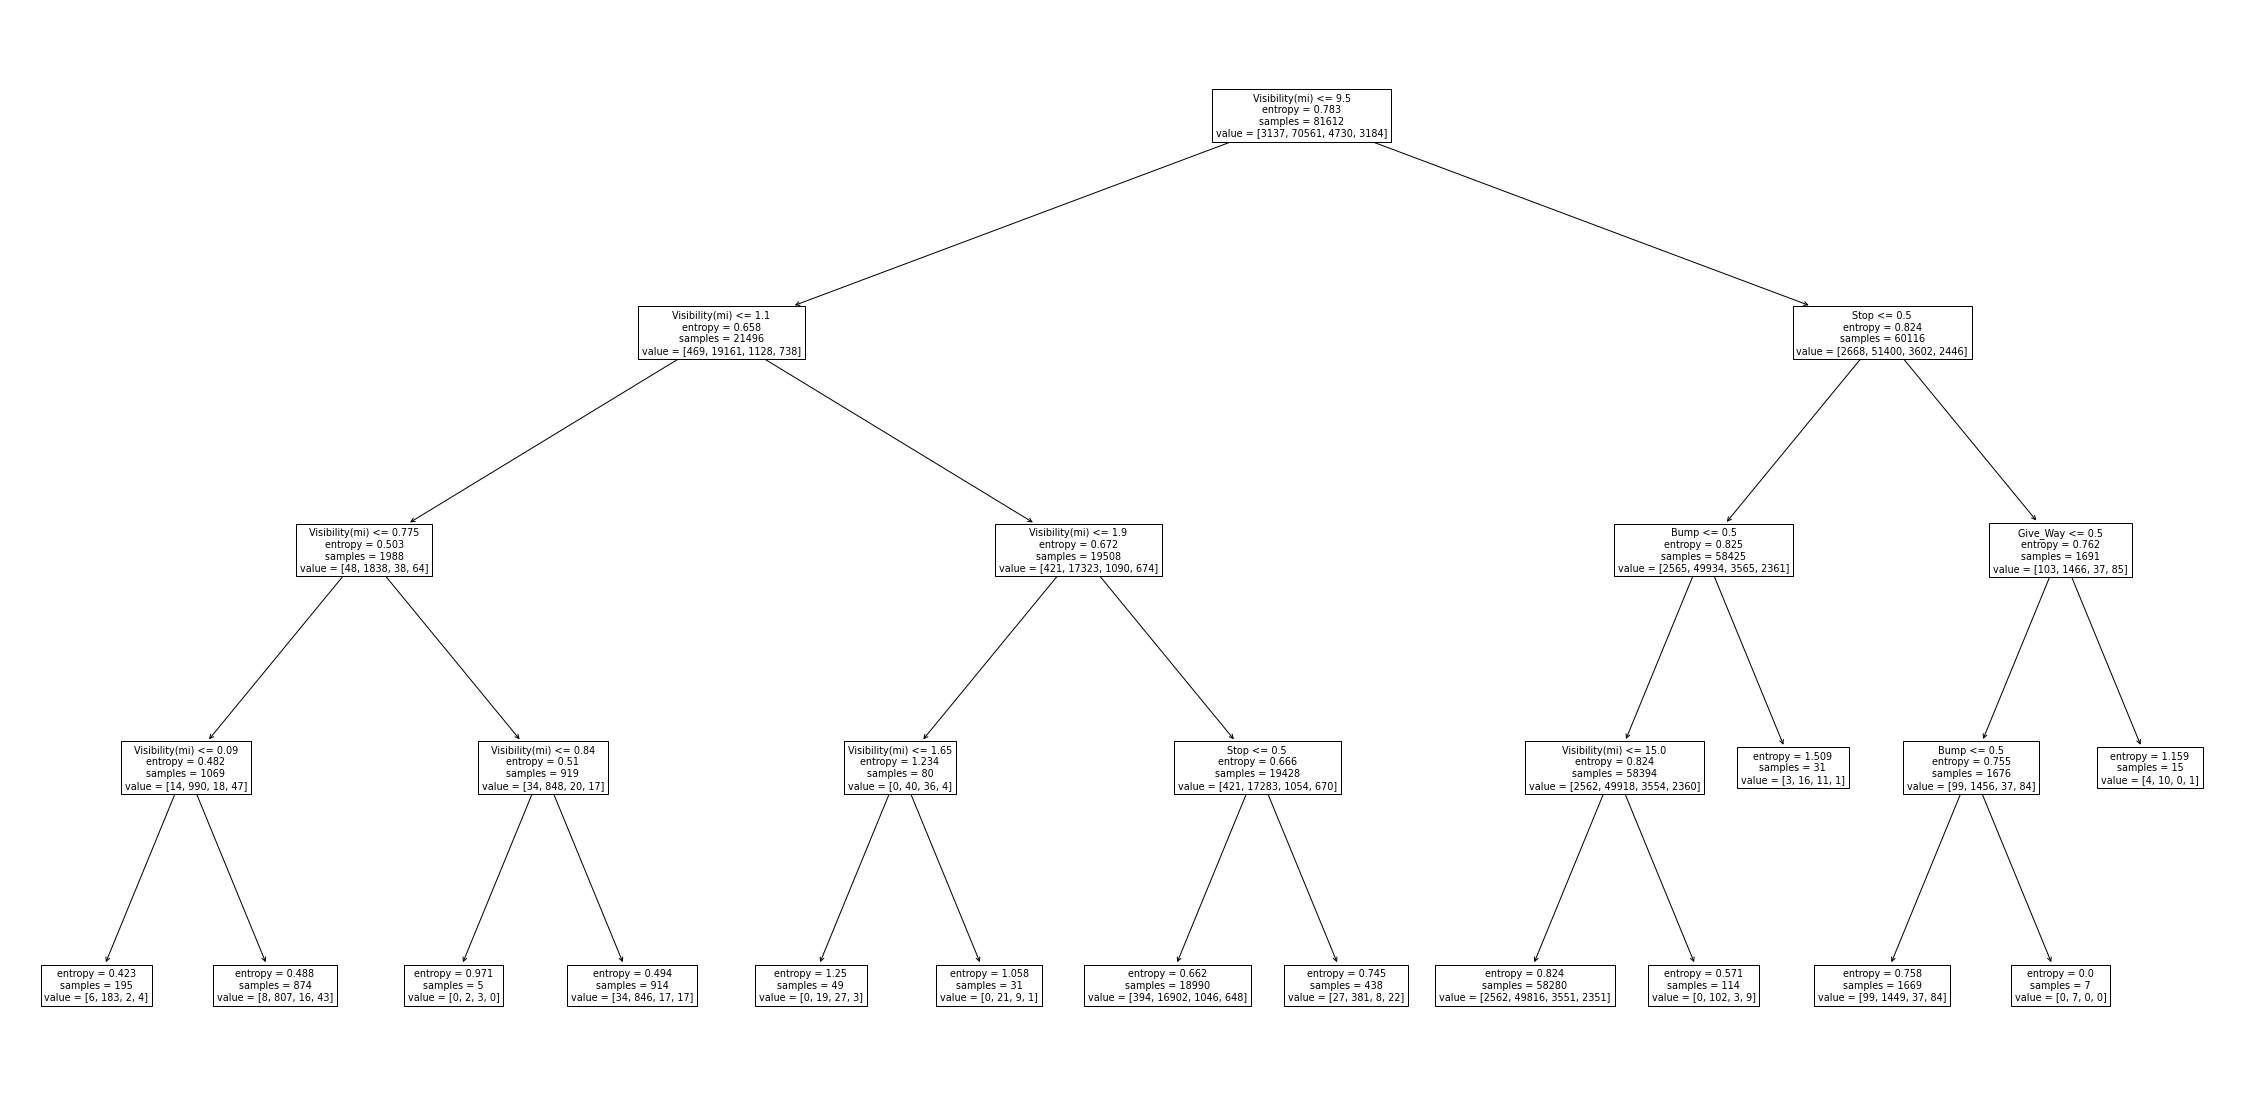

In [31]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(40,20))
tree.plot_tree(clf1,feature_names=features)
plt.savefig('foo.png', bbox_inches='tight', transparent = False)
plt.show()

**DecisionTree of Imbalanced Data for Year 2020**

In [32]:
data_2020 = data[data["Year"] == 2020]

In [33]:
X_2020 = data_2020[features]
y_2020 = data_2020["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X_2020, y_2020, test_size=0.25, random_state=0)

In [34]:
# Create Decision Tree classifer object
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
print("Accuracy_NY:",metrics.accuracy_score(y_test, y_pred))

Accuracy_NY: 0.4758644553745767


In [36]:
dt_model = clf.best_params_
print(dt_model)

{'criterion': 'entropy', 'max_depth': 4}


**DecisionTree of Imbalanced Data for Year 2016-2021**

In [37]:
X = data[features]
y = data["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
# Create Decision Tree classifer object
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy_All:",metrics.accuracy_score(y_test, y_pred))

Accuracy_All: 0.6741668574418681


In [40]:
dt_model = clf.best_params_
print(dt_model)

{'criterion': 'entropy', 'max_depth': 8}
